In [1]:
from keras.layers import GlobalAveragePooling2D, Dropout, Dense
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from efficientnet.keras import EfficientNetB5
from keras.models import Sequential
from keras.optimizers import Adam

import matplotlib.pyplot as plt
from glob import glob
import pandas as pd
import numpy as np
import random
import cv2
import os

Using TensorFlow backend.


In [2]:
batch_size = 2

size = 160

In [3]:
path = "data\\dataset"
train_path = path + "\\train"
test_path = path + "\\test"

In [4]:
numberOfClasses = len(glob(train_path + "\\*"))

numberOfClasses

4

# Data Augmentation 

In [5]:
train_datagen = ImageDataGenerator(horizontal_flip=True, 
                                   zoom_range=0.3)

test_datagen = ImageDataGenerator()

# Flow From Directory

In [6]:
train_datagen = train_datagen.flow_from_directory(directory=train_path,
                                                  target_size=(size, size),
                                                  class_mode='categorical',
                                                  batch_size=batch_size, 
                                                  shuffle=True)

test_datagen = test_datagen.flow_from_directory(directory=test_path,
                                                target_size=(size, size),
                                                class_mode='categorical',
                                                batch_size=batch_size, 
                                                shuffle=True)

Found 83484 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.


In [7]:
train_datagen[0][0].shape

(2, 160, 160, 3)

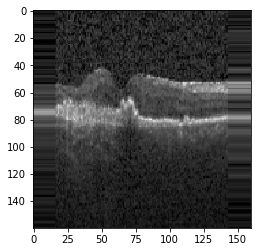

In [8]:
plt.imshow(train_datagen[0][0][0]/255);

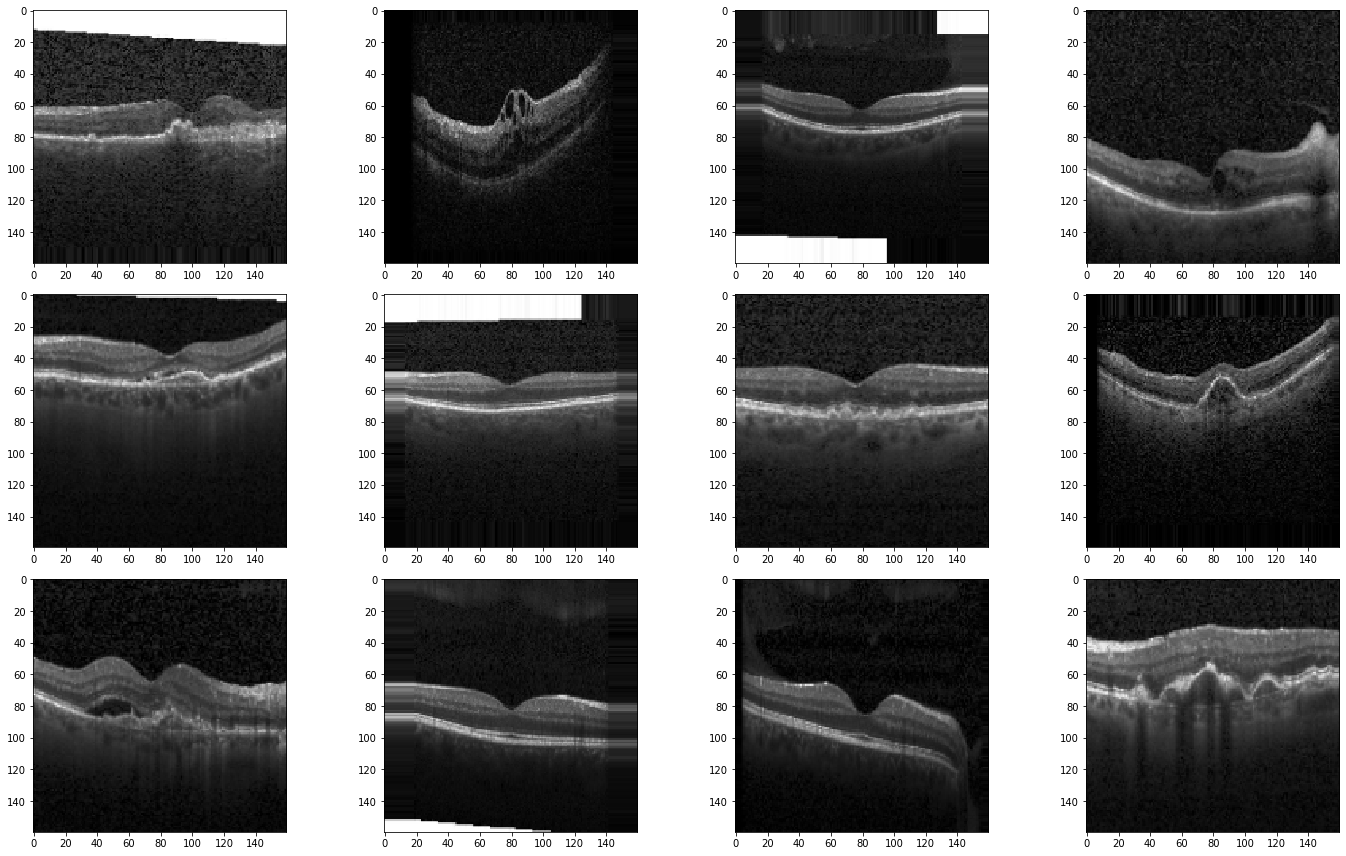

In [9]:
fig = plt.figure(figsize=(20,12))

for im in range(12):
    img = train_datagen[im][0][0]/255
    fig.add_subplot(3,4,im+1)
    plt.imshow(img)
    
plt.tight_layout()

# Callbacks

In [10]:
lr = ReduceLROnPlateau(monitor="val_loss", 
                       factor=0.3, 
                       patience=5, 
                       verbose=1, 
                       mode="max")

cp = ModelCheckpoint(filepath="data/model/effiency_model.{epoch:02d}-{val_los:.2f}.h5", 
                     save_best_only=True)

# Transfer Learning

--> This is multi classes problem, therefore I need to use "softmax"

In [11]:
model = Sequential()
model.add(EfficientNetB5(include_top=False, input_shape=(size,size,3)))
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(numberOfClasses, activation="softmax"))


model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Shapes are always computed; don't use the compute_shapes as it has no effect.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


# Training

In [15]:
hist = model.fit_generator(generator=train_datagen, 
                           steps_per_epoch=train_datagen.n//(batch_size*40), 
                           validation_data=test_datagen,
                           validation_steps=test_datagen.n//(batch_size*40), 
                           callbacks=[lr, cp],
                           epochs=1)

Epoch 1/2
2087/2087 [==============================] - 623s 299ms/step - loss: 0.5030 - acc: 0.8323 - val_loss: 0.2204 - val_acc: 0.9600


KeyError: 'val_los'